In [3]:
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import time
import argparse
from sklearn.model_selection import learning_curve, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
simulator_columns = ['24', '26', '22', '18', '20', '23', '19']
evaluator_columns = ['24', '18', '22', '23', '20', '26', '19', '25', '16'] #, '25']
simulator_label = 'credit_score_category'
evaluator_label = 'lender_score_category'
input_path="../../data/processed/clean_data.csv"
df = pd.read_csv(input_path)
#data = df[simulator_columns]
#labels = df[simulator_label]

data = df[evaluator_columns]
labels = df[evaluator_label]

data.head()

,24,18,22,23,20,26,19,25,16
0,3,2,3,2,3,3,2,4,3
1,2,2,4,5,2,2,2,3,3
2,2,2,2,2,2,3,2,3,3
3,3,2,3,3,1,2,2,3,3
4,2,2,2,3,3,3,1,3,3


c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


score: 0.9653
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3993
           2       0.97      0.97      0.97      3279
           3       0.92      0.93      0.92      1275
           4       0.85      0.81      0.83       238
           5       0.88      0.70      0.78        30

   micro avg       0.97      0.97      0.97      8815
   macro avg       0.92      0.88      0.90      8815
weighted avg       0.97      0.97      0.97      8815



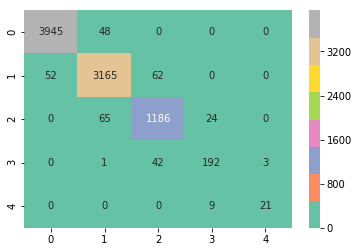

In [7]:

# split to train/test 70/30
train, test, train_class, test_class = train_test_split(data, labels, test_size=0.3)
# upsample both training sets
train, train_class = SMOTE().fit_resample(train, train_class)
# the parameters of the classifier were identified by the rf_tuning module
model =RandomForestClassifier()
# fit the model
_ = model.fit(train, train_class)
# calculate stats
predictions = model.predict(test)
report = classification_report(test_class, predictions)
matrix = confusion_matrix(test_class, predictions)

print("score: {:.4}".format( model.score(test, test_class)))
print(report)
_ = sns.heatmap(pd.DataFrame(matrix), annot=True, fmt="d", cmap='Set2')